## GPcounts with zero-inflated negative binomial likelihood

Nuha BinTayyash, 2020

This notebook comapre GPcount fit with zero-inflated negative binomial, negative binomial and Gaussian likelihoods on ScRNA-seq gene expression data for highly expressed genes in Islet $\alpha$ cell from [GSE8737 single cell RNA-seq ](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE87375) dataset.

In [1]:
import pandas as pd
import numpy as np

Load $\alpha$ dataset and pseudotime information

In [2]:
Y = pd.read_csv('alpha_counts.csv',index_col=[0])
X = pd.read_csv('alpha_time_points.csv',index_col=[0])

#### Fit GPcount with zero inflated negative binomial likelihood

In [3]:
from GPcounts.GPcounts_Module import Fit_GPcounts

In [4]:
gene_name = ['Fam184b','Pde1a']
gp_counts = Fit_GPcounts(X,Y.loc[gene_name]) 

Probabilty of zeros in Fam184b and Pde1a genes

In [5]:
Y.loc[gene_name][Y.loc[gene_name] == 0].count(axis=1)/len(Y.columns)

Symbol
Fam184b    0.862805
Pde1a      0.689024
dtype: float64

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

def plot(likelihood,xtest,model,mean,var):
         
    fig = plt.figure()
    plt.ylabel('Gene Expression', fontsize=16)
    plt.xlabel('Times', fontsize=16)

   
    if likelihood == 'Gaussian':
        y = np.log(model.data[1]+1)
        plt.fill_between(xtest[:,0],
                            mean[:,0] - 2*np.sqrt(var[:,0]),
                            mean[:,0] + 2*np.sqrt(var[:,0]), alpha=0.2)
    else:
        y = model.data[1]
        lowess = sm.nonparametric.lowess
        percentile_5 = lowess(np.percentile(var, 5, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        percentile_95 = lowess(np.percentile(var, 95, axis=0),xtest[:,0],frac=1./5, return_sorted=False)
        plt.fill_between(xtest[:,0],percentile_5,percentile_95,alpha = 0.2)

    plt.scatter(model.data[0],model.data[1], s=10, color='black', alpha=0.6) #data
    plt.plot(xtest, mean, lw=2) 
    plt.show()

In [8]:
likelihood_zinb = 'Zero_inflated_negative_binomial' 
log_likelihood_zinb = gp_counts.Infer_trajectory(likelihood_zinb)
log_likelihood_zinb

100%|██████████| 2/2 [00:43<00:00, 21.59s/it]


,Dynamic_model_log_likelihood
Fam184b,-295.271124
Pde1a,-598.079827


Fam184b


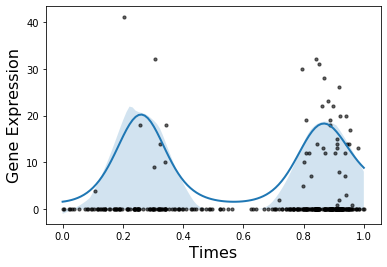

Pde1a


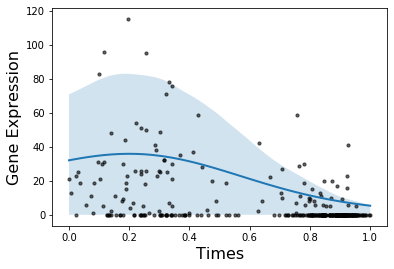

In [9]:
likelihood_zinb = 'Zero_inflated_negative_binomial' 
indexes = log_likelihood_zinb.index.values # list of genes to be plotted 
test = 'Infer_trajectory' # name of the test
xtest = np.linspace(np.min(X.values),np.max(X.values),100)[:,None] # points to make prediction
sample = True # sample or/and load model 
params = gp_counts.load_and_sample_models(indexes,test,xtest,likelihood_zinb,sample)

for i in range(len(indexes)):
    print(indexes[i])    
    for model,mean,var in zip(params['models'][i],params['means'][i],params['vars'][i]):
        mean = np.array(mean)
        var = np.array(var)
        plot(likelihood_zinb,xtest,model,mean,var)

#### Fit GPcount with negative binomial likelihood

In [10]:
likelihood_nb = 'Negative_binomial' 
log_likelihood_nb = gp_counts.Infer_trajectory(likelihood_nb)
log_likelihood_nb

100%|██████████| 2/2 [00:14<00:00,  7.01s/it]


,Dynamic_model_log_likelihood
Fam184b,-316.895256
Pde1a,-642.953422


Fam184b


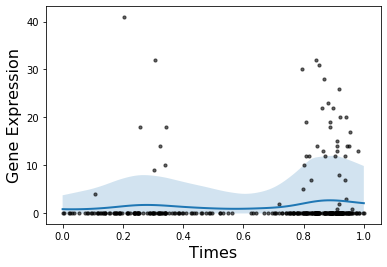

Pde1a


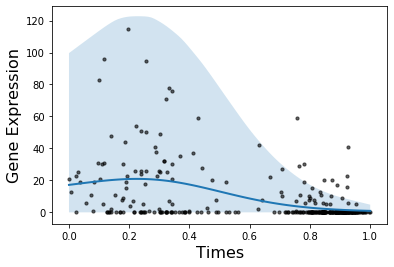

In [11]:
params = gp_counts.load_and_sample_models(indexes,test,xtest,likelihood_nb,sample)
for i in range(len(indexes)):
    print(indexes[i])
    for model,mean,var in zip(params['models'][i],params['means'][i],params['vars'][i]):
        mean = np.array(mean)
        var = np.array(var)
        plot(likelihood_nb,xtest,model,mean,var)

#### Fit GPcount with Gaussian likelihood

In [12]:
likelihood_Gaussian = 'Gaussian' 
log_likelihood_Gaussian = gp_counts.Infer_trajectory(likelihood_Gaussian)
log_likelihood_Gaussian

100%|██████████| 2/2 [00:01<00:00,  1.85it/s]


,Dynamic_model_log_likelihood
Fam184b,-442.142330
Pde1a,-537.039584


Fam184b


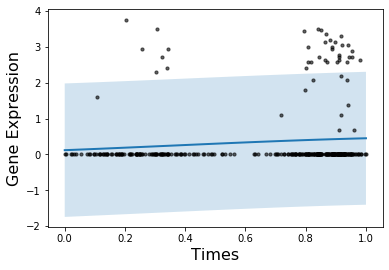

Pde1a


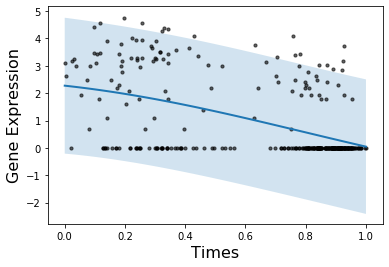

In [13]:
params = gp_counts.load_and_sample_models(indexes,test,xtest,likelihood_Gaussian,sample)
for i in range(len(indexes)):
    print(indexes[i])
    for model,mean,var in zip(params['models'][i],params['means'][i],params['vars'][i]):
        mean = np.array(mean)
        var = np.array(var)
        plot(likelihood_Gaussian,xtest,model,mean,var)